In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, r2_score, mean_absolute_error

In [2]:
df1=pd.read_csv('entertainment_data.csv')
df2=pd.read_csv('business_data.csv')
df3=pd.read_csv('education_data.csv')
df4=pd.read_csv('sports_data.csv')
df5=pd.read_csv('technology_data.csv')

In [3]:
# joining all the dataframes
dfs=[df1,df2,df3,df4,df5]
df = pd.concat(dfs)

In [5]:
# Shuffling the columns so the df have some randomness
from sklearn.utils import shuffle
df = shuffle(df)

In [6]:
df.head()

,headlines,description,content,url,category
1253,Twitch users can now simultaneously stream on ...,Twitch says streamers who don't have an exclus...,"At the recently concluded TwitchCon Las Vegas,...",https://indianexpress.com/article/technology/t...,technology
453,"Harbhajan Singh: ‘Not in terms of skills, but ...",One of the stars of India’s 2001 comeback seri...,Harbhajan Singh on Australian Cricket Team: In...,https://indianexpress.com/article/sports/crick...,sports
348,RBI to bring digital loan aggregators under re...,Digital lenders have been accused of charging ...,The Reserve Bank of India (RBI) has decided to...,https://indianexpress.com/article/business/ban...,business
625,UK’s Institute of Civil Engineers: Anusha Shah...,Shah was one of the only two candidates to win...,The Institute of Civil Engineers (ICE) has ele...,https://indianexpress.com/article/education/uk...,education
1075,IIT Delhi introduces online course on Project ...,The programme will have a mid term and an end ...,The Continuing Education Programme (CEP) of th...,https://indianexpress.com/article/education/ii...,education


In [7]:
# resetting the index
df.reset_index(inplace=True)

In [8]:
df.head()

,index,headlines,description,content,url,category
0,1253,Twitch users can now simultaneously stream on ...,Twitch says streamers who don't have an exclus...,"At the recently concluded TwitchCon Las Vegas,...",https://indianexpress.com/article/technology/t...,technology
1,453,"Harbhajan Singh: ‘Not in terms of skills, but ...",One of the stars of India’s 2001 comeback seri...,Harbhajan Singh on Australian Cricket Team: In...,https://indianexpress.com/article/sports/crick...,sports
2,348,RBI to bring digital loan aggregators under re...,Digital lenders have been accused of charging ...,The Reserve Bank of India (RBI) has decided to...,https://indianexpress.com/article/business/ban...,business
3,625,UK’s Institute of Civil Engineers: Anusha Shah...,Shah was one of the only two candidates to win...,The Institute of Civil Engineers (ICE) has ele...,https://indianexpress.com/article/education/uk...,education
4,1075,IIT Delhi introduces online course on Project ...,The programme will have a mid term and an end ...,The Continuing Education Programme (CEP) of th...,https://indianexpress.com/article/education/ii...,education


In [9]:
df.shape

(10000, 6)

In [10]:
# removing the useless columns like index and url
df.drop(columns=["index","url"],inplace=True)

In [11]:
df['category'].value_counts()

category
technology       2000
sports           2000
business         2000
education        2000
entertainment    2000
Name: count, dtype: int64

In [12]:
# mapping
def map_category(category):
    category_map = {
        'sports': 0,
        'business': 1,
        'entertainment': 2,
        'education': 3,
        'technology': 4
    }
    return category_map.get(category, -1)
df['Category'] = df['category'].apply(map_category)

In [13]:
df.drop(columns=['category'],inplace=True)

In [14]:
df.head()

,headlines,description,content,Category
0,Twitch users can now simultaneously stream on ...,Twitch says streamers who don't have an exclus...,"At the recently concluded TwitchCon Las Vegas,...",4
1,"Harbhajan Singh: ‘Not in terms of skills, but ...",One of the stars of India’s 2001 comeback seri...,Harbhajan Singh on Australian Cricket Team: In...,0
2,RBI to bring digital loan aggregators under re...,Digital lenders have been accused of charging ...,The Reserve Bank of India (RBI) has decided to...,1
3,UK’s Institute of Civil Engineers: Anusha Shah...,Shah was one of the only two candidates to win...,The Institute of Civil Engineers (ICE) has ele...,3
4,IIT Delhi introduces online course on Project ...,The programme will have a mid term and an end ...,The Continuing Education Programme (CEP) of th...,3


In [15]:
# joining the columns to create one and then i will drop the columns
df['Content'] = df['headlines'] + ' ' + df['description'] + ' ' + df['content']

df.drop(['headlines', 'description', 'content'], axis=1, inplace=True)

In [16]:
df.head()

,Category,Content
0,4,Twitch users can now simultaneously stream on ...
1,0,"Harbhajan Singh: ‘Not in terms of skills, but ..."
2,1,RBI to bring digital loan aggregators under re...
3,3,UK’s Institute of Civil Engineers: Anusha Shah...
4,3,IIT Delhi introduces online course on Project ...


In [17]:
total_word_count = 0
for content in df['Content']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

2646524


In [22]:
ps = PorterStemmer()

In [23]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [24]:
df['Content'] = df['Content'].apply(stemming)

In [25]:
df.head()

,Category,Content
0,4,twitch user simultan stream platform twitch sa...
1,0,harbhajan singh term skill mental fragil austr...
2,1,rbi bring digit loan aggreg regul digit lender...
3,3,uk institut civil engin anusha shah take first...
4,3,iit delhi introduc onlin cours project manag p...


In [26]:
# so after pre-proccessing around 1M words that are stop words , numbers etc were removed
total_word_count = 0
for content in df['Content']:
    total_word_count += sum(1 for _ in content.split())
print(total_word_count)

1580692


In [27]:
X = df['Content']
Y = df['Category']

In [28]:
X_train , X_test , Y_train , Y_test  = train_test_split(X, Y, test_size = 0.2 , stratify = Y , random_state = 42)

In [29]:
# Vectorization
vc = TfidfVectorizer()
X_train = vc.fit_transform(X_train)
X_test = vc.transform(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.svm import SVC

In [31]:
def val_to_category(val):
    category_map = {
        0:'sports',
        1:'business',
        2:'entertainment',
        3:'education',
        4:'technology'
     }
    return category_map.get(val,-1)


In [32]:
def make_predictions(headlines,	description, content):
    text = headlines + " "+description +" "+ content
    text = stemming(text)
    text = vc.transform([text])
    val = model.predict(text)
    val = val_to_category(int(val[0]))
    print("News category is : ",val)

In [33]:
model = SVC()
model.fit(X_train, Y_train)

# Make predictions
Y_pred_cls = model.predict(X_test)

accuracy_cls = accuracy_score(Y_test, Y_pred_cls)

f1_cls = f1_score(Y_test, Y_pred_cls, average='weighted')

report_cls = classification_report(Y_test, Y_pred_cls)

# Print the results for classification
print(f"Model: SVM")
print(f"Accuracy: {accuracy_cls:.4f}")
print(f"F1-Score: {f1_cls:.4f}")
print(f"Classification Report:\n{report_cls}")
print("="*50)

Model: SVM
Accuracy: 0.9860
F1-Score: 0.9860
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       400
           1       0.99      0.97      0.98       400
           2       1.00      1.00      1.00       400
           3       1.00      0.99      0.99       400
           4       0.96      0.98      0.97       400

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [34]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# Make predictions using Random Forest
Y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf, average='weighted')
report_rf = classification_report(Y_test, Y_pred_rf)

# Print results for Random Forest
print("Model: Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Classification Report:\n{report_rf}")
print("="*50)


Model: Random Forest
Accuracy: 0.9710
F1-Score: 0.9711
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       400
           1       0.96      0.96      0.96       400
           2       1.00      0.97      0.98       400
           3       0.99      0.98      0.98       400
           4       0.93      0.96      0.95       400

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [35]:
# Initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

# Make predictions using Logistic Regression
Y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression model
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
f1_lr = f1_score(Y_test, Y_pred_lr, average='weighted')
report_lr = classification_report(Y_test, Y_pred_lr)

# Print results for Logistic Regression
print("Model: Logistic Regression")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print(f"Classification Report:\n{report_lr}")
print("="*50)


Model: Logistic Regression
Accuracy: 0.9820
F1-Score: 0.9820
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       400
           1       0.97      0.96      0.97       400
           2       1.00      1.00      1.00       400
           3       0.99      0.99      0.99       400
           4       0.96      0.96      0.96       400

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



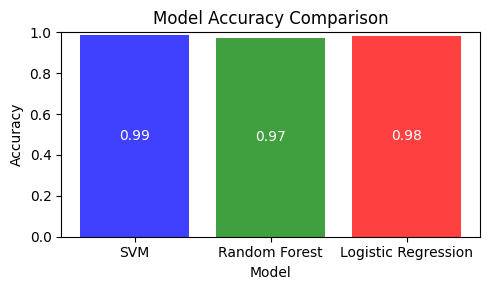

In [47]:
# Define accuracy values
accuracies = [accuracy_cls, accuracy_rf, accuracy_lr]

# Define model names
model_names = ['SVM', 'Random Forest', 'Logistic Regression']

# Plotting
plt.figure(figsize=(5,3))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red'], alpha=0.75)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set y-axis limit to 0-100%
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2, f'{accuracy:.2f}', ha='center', va='center', color='white')
plt.tight_layout()
plt.show()


In [50]:
def make_predictions_all_models(headlines, description, content):
    text = headlines + " " + description + " " + content
    text = stemming(text)
    text_vectorized = vc.transform([text])

    # Predictions using SVM
    svm_prediction = val_to_category(int(model.predict(text_vectorized)))

    # Predictions using Random Forest
    rf_prediction = val_to_category(int(rf_model.predict(text_vectorized)))

    # Predictions using Logistic Regression
    lr_prediction = val_to_category(int(lr_model.predict(text_vectorized)))

    print("Prediction using SVM:", svm_prediction)
    print("Prediction using Random Forest:", rf_prediction)
    print("Prediction using Logistic Regression:", lr_prediction)

# Example usage
make_predictions_all_models("kohli got his 50th century", "kholi has scored his 50th century today at stadium", "the run machine kholi hit another milestone by scoring his 50th odi century today at stadium")


Prediction using SVM: sports
Prediction using Random Forest: sports
Prediction using Logistic Regression: sports


<ipython-input-50-77c1885210e4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  svm_prediction = val_to_category(int(model.predict(text_vectorized)))
<ipython-input-50-77c1885210e4>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rf_prediction = val_to_category(int(rf_model.predict(text_vectorized)))
<ipython-input-50-77c1885210e4>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lr_prediction = val_to_category(int(lr_model.predict(text_vectorized)))


In [40]:
# Example usage with different sentences
make_predictions_all_models("New iPhone features leaked", "Rumors suggest major upgrades for the upcoming iPhone model", "Tech enthusiasts are eagerly awaiting the release of the latest iPhone with improved features and performance")

Prediction using SVM: technology
Prediction using Random Forest: technology
Prediction using Logistic Regression: technology


<ipython-input-39-77c1885210e4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  svm_prediction = val_to_category(int(model.predict(text_vectorized)))
<ipython-input-39-77c1885210e4>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rf_prediction = val_to_category(int(rf_model.predict(text_vectorized)))
<ipython-input-39-77c1885210e4>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lr_prediction = val_to_category(int(lr_model.predict(text_vectorized)))


In [41]:
make_predictions_all_models("Stock market hits all-time high", "Investors optimistic about future economic growth", "The stock market surged today as investors reacted positively to news of strong economic indicators and corporate earnings reports")

Prediction using SVM: business
Prediction using Random Forest: business
Prediction using Logistic Regression: business


<ipython-input-39-77c1885210e4>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  svm_prediction = val_to_category(int(model.predict(text_vectorized)))
<ipython-input-39-77c1885210e4>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rf_prediction = val_to_category(int(rf_model.predict(text_vectorized)))
<ipython-input-39-77c1885210e4>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lr_prediction = val_to_category(int(lr_model.predict(text_vectorized)))


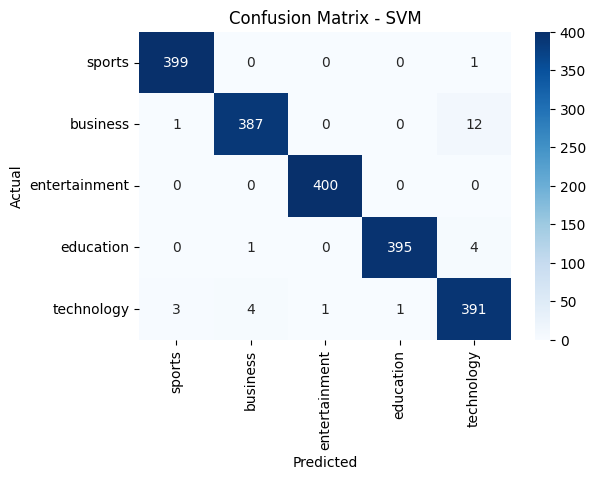

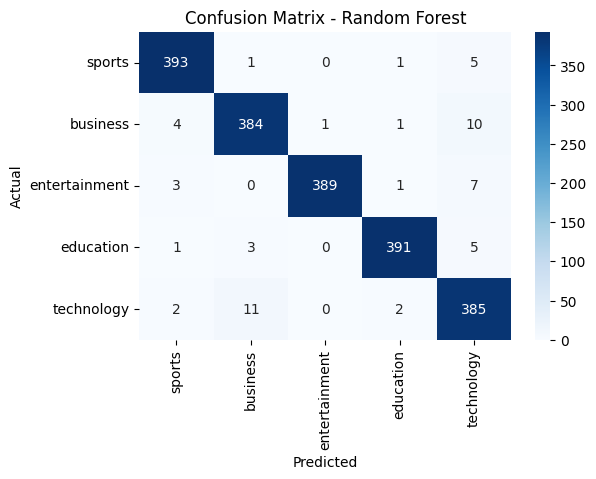

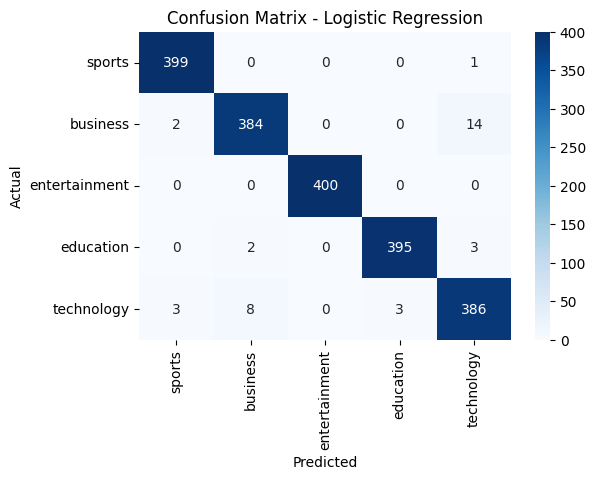

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for SVM
cm_svm = confusion_matrix(Y_test, Y_pred_cls)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['sports', 'business', 'entertainment', 'education', 'technology'], yticklabels=['sports', 'business', 'entertainment', 'education', 'technology'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['sports', 'business', 'entertainment', 'education', 'technology'], yticklabels=['sports', 'business', 'entertainment', 'education', 'technology'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(Y_test, Y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['sports', 'business', 'entertainment', 'education', 'technology'], yticklabels=['sports', 'business', 'entertainment', 'education', 'technology'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
